In [1]:
import pandas as pd
from sklearn import datasets

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
data = datasets.load_boston()
raw_dataset = pd.DataFrame(data['data'], columns=data['feature_names'])
raw_dataset.loc[:, 'MEDV'] = data['target']
dataset = raw_dataset.copy()

In [3]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [4]:
dataset.shape

(506, 14)

### Dataset description

Number of Instances: 506 

Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

Attribute Information:

|Feature|Description|
|---|---| 
|CRIM |     per capita crime rate by town| 
|          ZN  |      proportion of residential land zoned for lots over 25,000 sq.ft.| 
|          INDUS |    proportion of non-retail business acres per town| 
|          CHAS  |    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)| 
|           NOX  |     nitric oxides concentration (parts per 10 million)| 
|           RM  |      average number of rooms per dwelling| 
|           AGE  |     proportion of owner-occupied units built prior to 1940| 
|           DIS  |     weighted distances to five Boston employment centres| 
|           RAD |      index of accessibility to radial highways| 
|          TAX  |     full-value property-tax rate per 10000 USD | 
|          PTRATIO|   pupil-teacher ratio by town| 
|           B    |     1000(Bk - 0.63)^2 where Bk is the proportion of black people by town| 
|           LSTAT |    % lower status of the population| 
|           MEDV  |    Median value of owner-occupied homes in $1000's| 




## División train y test

In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
train_dataset.shape

(405, 14)

In [7]:
test_dataset.shape

(101, 14)

# Data exploration

In [8]:
import seaborn as sns

In [ ]:
sns.pairplot(train_dataset, diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

<AxesSubplot:>

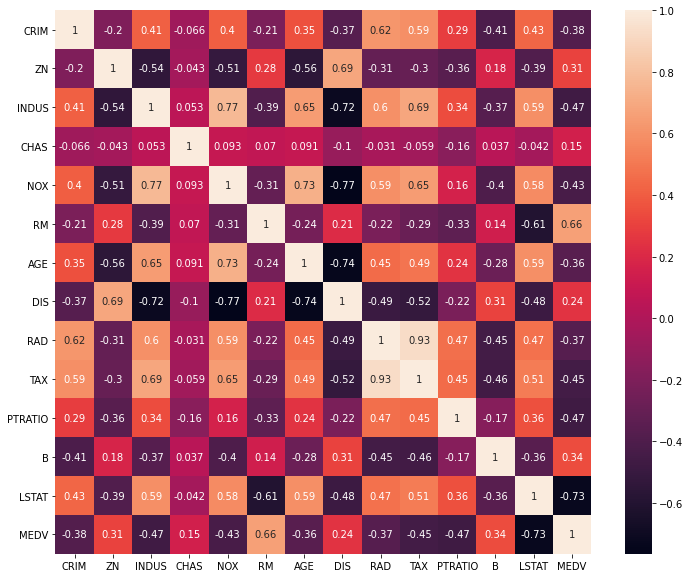

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(train_dataset.corr(), annot=True, ax=ax) 

# Data preprocessing

- Separar la etiqueta o valor a predecir de las features.

In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MEDV')
test_labels = test_features.pop('MEDV')

Normalization

In [11]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
CRIM,3.670339,8.977954
ZN,11.067901,22.688396
INDUS,11.097951,6.699157
CHAS,0.069136,0.253999
NOX,0.553098,0.115564
RM,6.269768,0.690552
AGE,68.241975,27.908527
DIS,3.834098,2.162173
RAD,9.474074,8.618564
TAX,405.839506,164.057951


- Es una buena práctica normalizar las features para que esten todas en el mismo rango.

In [12]:
train_mean = train_features.mean()
train_std = train_features.std()

train_features = (train_features - train_mean) / train_std
test_features = (test_features - train_mean) / train_std

In [13]:
train_features.describe().transpose()[['mean', 'std']]

,mean,std
CRIM,3.947460e-17,1.0
ZN,-6.579099e-17,1.0
INDUS,-3.728156e-17,1.0
CHAS,5.153628e-17,1.0
NOX,-1.688636e-16,1.0
RM,2.324615e-16,1.0
AGE,2.456197e-16,1.0
DIS,-3.443062e-16,1.0
RAD,-1.052656e-16,1.0
TAX,1.008795e-16,1.0


# Linear regression con una feature

In [14]:
linear_one_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1)
])

In [15]:
linear_one_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
linear_one_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [17]:
history = linear_one_model.fit(
    train_features['LSTAT'], train_labels,
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir='tutorial_regresion/linear_one_model', histogram_freq=1)],
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
11/11 [==============================] - 2s 172ms/step - loss: 21.5958 - val_loss: 22.4491
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 20.6898 - val_loss: 21.3753
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 19.6270 - val_loss: 20.3162
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 19.1083 - val_loss: 19.2378
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 18.4683 - val_loss: 18.1565
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 16.8504 - val_loss: 17.0747
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 15.3889 - val_loss: 15.9837
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 13.7542 - val_loss: 14.8765
Epoch 9/100
11/11 [==============================] - 0s 9ms/step - loss: 14.2061 - val_loss: 13.7808
Epoch 10/100
11/11 [==============================] - 0s 28ms/step - loss: 11.8531 

<AxesSubplot:xlabel='epoch'>

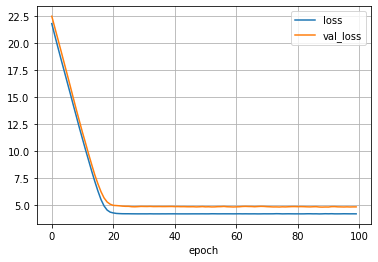

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist = hist.set_index('epoch')
hist.plot(grid=True)

In [19]:
x = tf.linspace(train_features['LSTAT'].min(), train_features['LSTAT'].max(), 100)
y = linear_one_model.predict(x)

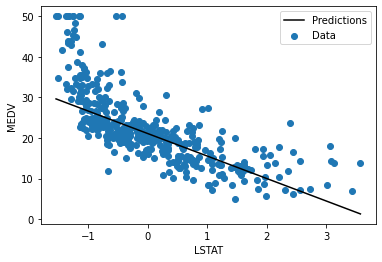

In [20]:
plt.scatter(train_features['LSTAT'], train_labels, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()

In [21]:
linear_one_model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-5.545611]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([21.097363], dtype=float32)>]

In [22]:
test_results = pd.DataFrame(columns=['train', 'test'])

In [23]:
test_results.loc['linear_one_model','test'] = linear_one_model.evaluate(
    test_features['LSTAT'], test_labels, verbose=0
)
test_results.loc['linear_one_model','train'] = linear_one_model.evaluate(
    train_features['LSTAT'], train_labels, verbose=0
)

In [24]:
test_results

,train,test
linear_one_model,4.285994,4.238972


___

## Lineal model con todas las features

In [25]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=train_features.shape[1])
])

In [26]:
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [27]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [28]:
history = linear_model.fit(
    train_features, train_labels,
    epochs=100,
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir='tutorial_regresion/linear_model', histogram_freq=1)],
    validation_split = 0.2)

Epoch 1/100
11/11 [==============================] - 1s 63ms/step - loss: 21.6725 - val_loss: 22.4646
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 20.5206 - val_loss: 21.5173
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 19.4412 - val_loss: 20.5448
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 19.2653 - val_loss: 19.4721
Epoch 5/100
11/11 [==============================] - 0s 11ms/step - loss: 17.3025 - val_loss: 18.4482
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 16.4681 - val_loss: 17.4274
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 15.5163 - val_loss: 16.3753
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 14.8832 - val_loss: 15.2288
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 13.1339 - val_loss: 14.1547
Epoch 10/100
11/11 [==============================] - 0s 10ms/step - loss: 12.7494 

<AxesSubplot:xlabel='epoch'>

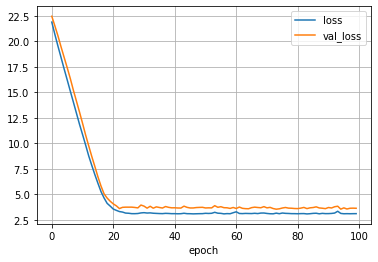

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist = hist.set_index('epoch')
hist.plot(grid=True)

In [30]:
test_results.loc['linear_model','test'] = linear_model.evaluate(test_features, test_labels, verbose=0)
test_results.loc['linear_model','train'] = linear_model.evaluate(train_features, train_labels, verbose=0)

In [31]:
test_results

,train,test
linear_one_model,4.285994,4.238972
linear_model,3.192941,2.874807


<BarContainer object of 13 artists>

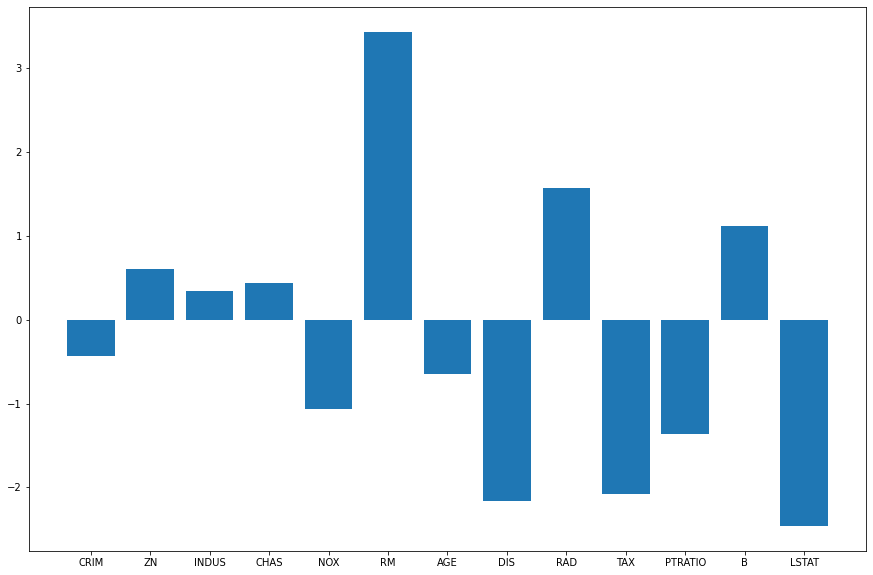

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(x=train_features.columns, height=linear_model.weights[0].numpy()[:, 0])

___

## Deep model con una feature

In [33]:
deep_one_model = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation='relu', input_dim=1),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [34]:
deep_one_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [35]:
deep_one_model.compile(loss='mean_absolute_error',
             optimizer=tf.keras.optimizers.Adam(0.001))

In [36]:
history = deep_one_model.fit(
    train_features['LSTAT'], train_labels,
    epochs=100,
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir='tutorial_regresion/linear_model', histogram_freq=1)],
    validation_split = 0.2)

Epoch 1/100
11/11 [==============================] - 1s 55ms/step - loss: 22.3436 - val_loss: 23.1766
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 21.6956 - val_loss: 22.8545
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 21.4669 - val_loss: 22.4569
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 21.2495 - val_loss: 21.9151
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 20.5008 - val_loss: 21.1895
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 19.3563 - val_loss: 20.2518
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 18.6330 - val_loss: 19.0638
Epoch 8/100
11/11 [==============================] - 0s 13ms/step - loss: 17.8097 - val_loss: 17.6785
Epoch 9/100
11/11 [==============================] - 0s 11ms/step - loss: 15.7141 - val_loss: 16.1041
Epoch 10/100
11/11 [==============================] - 0s 11ms/step - loss: 14.6861 - 

<AxesSubplot:xlabel='epoch'>

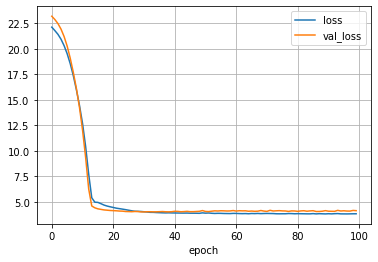

In [37]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist = hist.set_index('epoch')
hist.plot(grid=True)

In [38]:
x = tf.linspace(train_features['LSTAT'].min(), train_features['LSTAT'].max(), 1000)
y = deep_one_model.predict(x)

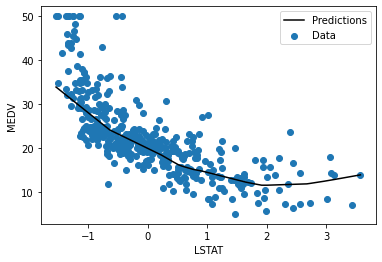

In [39]:
plt.scatter(train_features['LSTAT'], train_labels, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()

In [40]:
test_results.loc['deep_one_model','test'] = deep_one_model.evaluate(test_features['LSTAT'], test_labels, verbose=0)
test_results.loc['deep_one_model','train'] = deep_one_model.evaluate(train_features['LSTAT'], train_labels, verbose=0)

In [41]:
test_results

,train,test
linear_one_model,4.285994,4.238972
linear_model,3.192941,2.874807
deep_one_model,3.884676,4.062861


## Full model deep model

In [42]:
dnn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation='relu', input_dim=train_features.shape[1]),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [43]:
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [44]:
dnn_model.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [50]:
dnn_model.weights

[<tf.Variable 'dense_5/kernel:0' shape=(13, 64) dtype=float32, numpy=
 array([[ 2.00557664e-01, -3.28996718e-01, -3.11892778e-01,
         -1.74001069e-03, -3.97507437e-02, -1.36748448e-01,
         -4.25167859e-01, -2.93153435e-01,  1.14368126e-01,
          1.23976551e-01, -1.15106486e-01, -3.04828316e-01,
         -3.44683565e-02, -3.13963175e-01, -4.30064261e-01,
          1.81239188e-01, -5.92741407e-02, -1.28413528e-01,
          1.36509895e-01,  1.84328526e-01, -1.51370853e-01,
         -8.51954073e-02, -4.18112844e-01, -1.80656299e-01,
         -3.59540582e-01, -2.27436498e-01, -3.41422349e-01,
         -2.90462285e-01, -4.90679890e-01, -2.83450051e-03,
          1.43106341e-01,  8.91582891e-02, -3.69164050e-01,
         -5.80212288e-02,  1.06502861e-01, -1.55072268e-02,
         -9.55569185e-03,  3.46605815e-02,  4.41682078e-02,
         -3.32940698e-01, -7.47681409e-02, -1.00990087e-01,
          1.06913537e-01, -4.73613054e-01, -5.60467780e-01,
         -1.69902056e-01, -3.2

In [45]:
history = dnn_model.fit(
    train_features, train_labels,
    epochs=100,
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir='tutorial_regresion/linear_model', histogram_freq=1)],
    validation_split = 0.2
)

Epoch 1/100
11/11 [==============================] - 1s 59ms/step - loss: 22.4567 - val_loss: 22.7219
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 20.9148 - val_loss: 21.5061
Epoch 3/100
11/11 [==============================] - 0s 14ms/step - loss: 20.2961 - val_loss: 19.9873
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 17.8443 - val_loss: 17.9905
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 16.4014 - val_loss: 15.5816
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 13.5464 - val_loss: 12.7293
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 11.0596 - val_loss: 9.5481
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 8.0034 - val_loss: 7.1565
Epoch 9/100
11/11 [==============================] - 0s 9ms/step - loss: 6.7619 - val_loss: 6.0985
Epoch 10/100
11/11 [==============================] - 0s 10ms/step - loss: 5.8448 - val_l

<AxesSubplot:xlabel='epoch'>

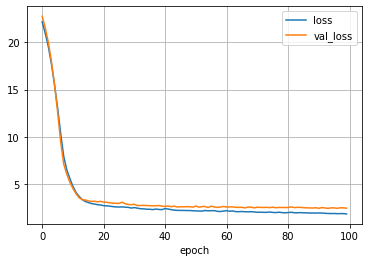

In [46]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist = hist.set_index('epoch')
hist.plot(grid=True)

In [47]:
test_results.loc['dnn_model','test'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_results.loc['dnn_model','train'] = dnn_model.evaluate(train_features, train_labels, verbose=0)

In [48]:
test_results

,train,test
linear_one_model,4.285994,4.238972
linear_model,3.192941,2.874807
deep_one_model,3.884676,4.062861
dnn_model,2.029016,2.238849


<AxesSubplot:>

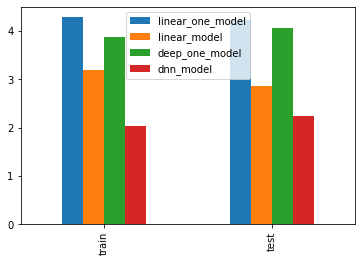

In [49]:
test_results.T.plot.bar()

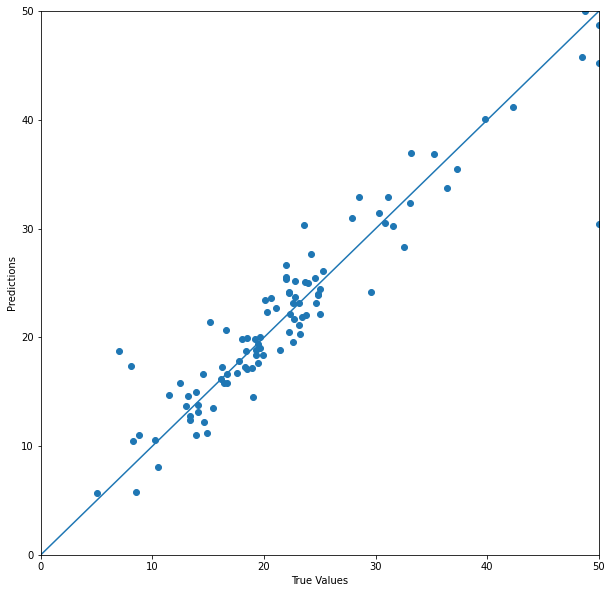

In [51]:
test_predictions = dnn_model.predict(test_features).flatten()

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(test_labels, test_predictions)
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
lims = [0, test_labels.max()]
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.plot(lims, lims)